In [68]:
import nltk

In [69]:
#nltk.download_shell()

In [70]:
#reading file by eliminating extra spaces at the end

smslines = [line.rstrip() for line in open(r'C:\Users\Pallempati Sowmya\Downloads\sms+spam+collection\SMSSpamCollection')]

In [71]:
print(len(smslines))

5574


In [72]:
import pandas as pd

In [73]:
smslines

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham\tU dun say so early hor... U c already then say...',
 "ham\tNah I don't think he goes to usf, he lives around here though",
 "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv",
 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.',
 "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'spam\tWINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. 

In [74]:
#since file is seperate with tabspaces using tab seperator and assigning column names

messages = pd.read_csv(r'C:\Users\Pallempati Sowmya\Downloads\sms+spam+collection\SMSSpamCollection', sep = '\t',
                       names = ['label', 'smstext'])

# Exploratory Data Analysis

In [75]:
messages.head()

,label,smstext
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [76]:
#lets understand data to see which terms actually groups into ham and spam

messages.groupby('label').describe()

smstext                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [77]:
#adding smslength column to understand length of each message

messages['smslength']=messages['smstext'].apply(len)

# Data Visualization

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

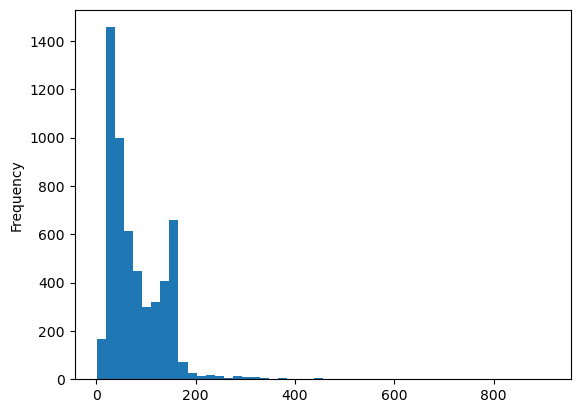

In [79]:
messages['smslength'].plot(bins=50, kind='hist') 

In [80]:
messages['smslength'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: smslength, dtype: float64

In [81]:
#printing the message with max length

max_length_texts = messages[messages['smslength'] == messages['smslength'].max()]['smstext'].iloc[0]
print(max_length_texts)


For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

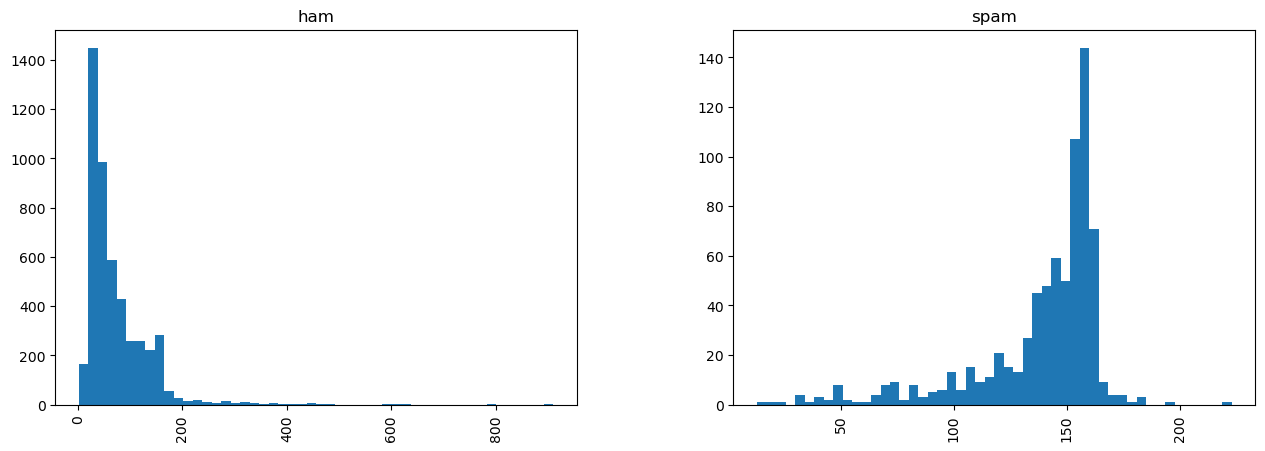

In [82]:
#checking length of messages by ham and spam

messages.hist(column='smslength', by='label', bins=50,figsize=(15,5))


#clear from visuals that ham messages has less characters.it can be one of the factor to clearly distinguish ham and spam

# Text Pre-Preprocessing

In [83]:
#removing punctuations and stop words

import string
from nltk.corpus import stopwords


In [84]:
#displaying few stop words
#will remove them from our sentennces as they donot help in differentiating ham or spam

stopwords.words('english')[0:10] 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [94]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    clearpunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    clearpunc = ''.join(clearpunc)
    
    # Now just remove any stopwords
    return [word for word in clearpunc.split() if word.lower() not in stopwords.words('english')]

In [102]:
#lets test the orginal and transformed data

messages.head()

,label,smstext,smslength
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [112]:
 messages['smstext'].apply(text_process).head(10)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
5    [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6    [Even, brother, like, speak, treat, like, aids...
7    [per, request, Melle, Melle, Oru, Minnaminungi...
8    [WINNER, valued, network, customer, selected, ...
9    [mobile, 11, months, U, R, entitled, Update, l...
Name: smstext, dtype: object

In [108]:
#now lets convert this tokens into vectors

from sklearn.feature_extraction.text import CountVectorizer


In [113]:
bag_of_words_transformer = CountVectorizer(analyzer=text_process).fit(messages['smstext'])

# Print total number of vocab words
print(len(bag_of_words_transformer.vocabulary_))

11425


In [118]:
#lets test by taking one message from the document

message6 = messages['smstext'][6]
print(message6)

Even my brother is not like to speak with me. They treat me like aids patent.


In [119]:
#transforming data 

bow6 = bag_of_words_transformer.transform([message6])
print(bow6)
print(bow6.shape)

#we can see that there are 7 unique words after removing stopwords and all from the sentence



  (0, 1802)	1
  (0, 4590)	1
  (0, 5193)	1
  (0, 7800)	2
  (0, 8761)	1
  (0, 9971)	1
  (0, 10629)	1
(1, 11425)


In [123]:
#if we observe stopwords such as  my, is, not, with, me, they has been removed

print("first word", bag_of_words_transformer.get_feature_names()[1802])
print("second word", bag_of_words_transformer.get_feature_names()[4590])
print("third word", bag_of_words_transformer.get_feature_names()[5193])
print("fourth word repeated twice", bag_of_words_transformer.get_feature_names()[7800])
print("sixth word", bag_of_words_transformer.get_feature_names()[8761])
print("first word", bag_of_words_transformer.get_feature_names()[9971])
print("first word", bag_of_words_transformer.get_feature_names()[10629])

first word Even
second word aids
third word brother
fourth word repeated twice like
sixth word patent
first word speak
first word treat


In [124]:
#Now we can use .transform on our Bag-of-Word transformed object and transform the entire DataFrame of messages

messages_bow = bag_of_words_transformer.transform(messages['smstext'])

In [125]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [137]:
#calculating tdidf(weights)

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf6 = tfidf_transformer.transform(bow6)
print(tfidf6)

  (0, 10629)	0.3352766696931058
  (0, 9971)	0.3268691780062757
  (0, 8761)	0.43700993321905807
  (0, 7800)	0.41453906826037096
  (0, 5193)	0.33843411088434017
  (0, 4590)	0.43700993321905807
  (0, 1802)	0.3352766696931058


In [129]:
#checkign weight for 'u'

print(tfidf_transformer.idf_[bag_of_words_transformer.vocabulary_['u']])

3.2800524267409408


In [130]:
#transforming entire corpus

messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


In [138]:
tfidf6 = tfidf_transformer.transform(bow6)
print(tfidf6)

  (0, 10629)	0.3352766696931058
  (0, 9971)	0.3268691780062757
  (0, 8761)	0.43700993321905807
  (0, 7800)	0.41453906826037096
  (0, 5193)	0.33843411088434017
  (0, 4590)	0.43700993321905807
  (0, 1802)	0.3352766696931058


# Training the Model

In [139]:
#now that we have transformed everything lets train the classification models for our problem

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])


In [141]:
#lets test for one message
print('predicted:', spam_detect_model.predict(tfidf6)[0])
print('expected:', messages.label[6])

predicted: ham
expected: ham


# Model Evaluation

In [142]:
#evaluating the model

all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [143]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [146]:
#here we have used all of our data asa training data which is not correct. 
#so lets split the data and use a data pipeline to convert raw data into each step we performed and finally fit model

from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['smstext'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test))

4457 1115


# Creating Data Pipeline


In [147]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [148]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002640E3AFA60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [149]:
predictions = pipeline.predict(msg_test)

In [150]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.97      0.98      1013
        spam       0.76      1.00      0.86       102

    accuracy                           0.97      1115
   macro avg       0.88      0.98      0.92      1115
weighted avg       0.98      0.97      0.97      1115



In [ ]:
#we can try different classification models by importing libraries and changing classifier methods.